<a href="https://colab.research.google.com/github/ranjiparker/ci/blob/main/perceptron_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def perceptron_learning():
  p=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
  d=np.array([0,0,0,1])
  w=np.array([0,0,0])
  whis=[]
  yhis=[]
  xhis=[]
  eta=1
  update=1
  up=[0,0,0,0]
  while update==1:
    for i in range(4):
      y=np.dot(p[i],w)
      whis.append(list(w))
      yhis.append(y)
      xhis.append(list(p[i]))
      if y>=0 and d[i]==0:
        w=np.subtract(w,np.dot(eta,p[i]))
        up[i]=1
      elif y<=0 and d[i]==1:
        w=np.add(w,np.dot(eta,p[i]))
        up[i]=1
      else:
        up[i]=0
      number_of_updates=np.dot(up,up)
      if number_of_updates>0:
        update=1
      else:
        update=0
  return w,whis,yhis,xhis

In [ ]:
w,whis,yhis,xhis=perceptron_learning()
print('i  |     xhis    |     whis    |   yhis')
for i in range(len(whis)):
  print(i,' | ',xhis[i],' | ',whis[i],' | ',yhis[i])


i  |     xhis    |     whis    |   yhis
0  |  [1, 0, 0]  |  [0, 0, 0]  |  0
1  |  [1, 0, 1]  |  [-1, 0, 0]  |  -1
2  |  [1, 1, 0]  |  [-1, 0, 0]  |  -1
3  |  [1, 1, 1]  |  [-1, 0, 0]  |  -1
4  |  [1, 0, 0]  |  [0, 1, 1]  |  0
5  |  [1, 0, 1]  |  [-1, 1, 1]  |  0
6  |  [1, 1, 0]  |  [-2, 1, 0]  |  -1
7  |  [1, 1, 1]  |  [-2, 1, 0]  |  -1
8  |  [1, 0, 0]  |  [-1, 2, 1]  |  -1
9  |  [1, 0, 1]  |  [-1, 2, 1]  |  0
10  |  [1, 1, 0]  |  [-2, 2, 0]  |  0
11  |  [1, 1, 1]  |  [-3, 1, 0]  |  -2
12  |  [1, 0, 0]  |  [-2, 2, 1]  |  -2
13  |  [1, 0, 1]  |  [-2, 2, 1]  |  -1
14  |  [1, 1, 0]  |  [-2, 2, 1]  |  0
15  |  [1, 1, 1]  |  [-3, 1, 1]  |  -1
16  |  [1, 0, 0]  |  [-2, 2, 2]  |  -2
17  |  [1, 0, 1]  |  [-2, 2, 2]  |  0
18  |  [1, 1, 0]  |  [-3, 2, 1]  |  -1
19  |  [1, 1, 1]  |  [-3, 2, 1]  |  0
20  |  [1, 0, 0]  |  [-2, 3, 2]  |  -2
21  |  [1, 0, 1]  |  [-2, 3, 2]  |  0
22  |  [1, 1, 0]  |  [-3, 3, 1]  |  0
23  |  [1, 1, 1]  |  [-4, 2, 1]  |  -1
24  |  [1, 0, 0]  |  [-3, 3, 2]  |  -3
25  |  

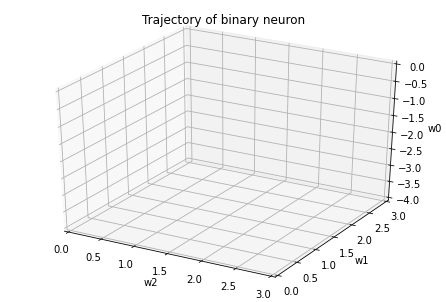

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from mpl_toolkits.mplot3d import Axes3D

 
# References
# https://gist.github.com/neale/e32b1f16a43bfdc0608f45a504df5a84
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
# https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation
 
# ANIMATION FUNCTION
def func(num, dataSet, line, redDots):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    redDots.set_data(dataSet[0:2, :num])    
    redDots.set_3d_properties(dataSet[2, :num]) 
    return line
 
 
# THE DATA POINTS

x=[]
y=[]
z=[]
for w in whis:
  x.append(w[0])
  y.append(w[1])
  z.append(w[2])
dataSet = np.array([z, y, x])
numDataPoints = len(z)
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
redDots = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='r', marker='o')[0] # For scatter plot
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
#fig = plt.figure()
#ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
#line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('w2')
ax.set_ylabel('w1')
ax.set_zlabel('w0')
ax.set_title('Trajectory of binary neuron')
ax.set_ylim(0,3)
ax.set_xlim(0, 3)
ax.set_zlim(-4,0)
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line,redDots), interval=50, blit=False)
from IPython.display import HTML
HTML(line_ani.to_html5_video())
rc('animation', html='html5')
line_ani

In [ ]:
xp=[]
yp=[]
for i in xhis:
  xp.append(i[1])
  yp.append(i[2])
xw=[]
yw=[]
for i in whis:
  
  if (i[2]==0):
    xw.append(-1*(i[0])/i[1])
    yw.append(0)
    xw.append(-1*(i[0])/i[1])
    yw.append(1)
  else:
    yw.append(-1*(i[0]+i[1]*0)/i[2])
    xw.append(0)
    yw.append(-1*(i[0]+i[1]*1)/i[2])
    xw.append(1)
print(whis)
print(len(xw))
print(len(yw))
print(len(xp))
print(len(yp))

[[0, 0, 0], [-1, 0, 0], [-1, 0, 0], [-1, 0, 0], [0, 1, 1], [-1, 1, 1], [-2, 1, 0], [-2, 1, 0], [-1, 2, 1], [-1, 2, 1], [-2, 2, 0], [-3, 1, 0], [-2, 2, 1], [-2, 2, 1], [-2, 2, 1], [-3, 1, 1], [-2, 2, 2], [-2, 2, 2], [-3, 2, 1], [-3, 2, 1], [-2, 3, 2], [-2, 3, 2], [-3, 3, 1], [-4, 2, 1], [-3, 3, 2], [-3, 3, 2], [-3, 3, 2], [-4, 2, 2], [-3, 3, 3], [-3, 3, 3], [-4, 3, 2], [-4, 3, 2], [-4, 3, 2], [-4, 3, 2], [-4, 3, 2], [-4, 3, 2]]
72
72
36
36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in long_scalars
  del sys.path[0]


0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


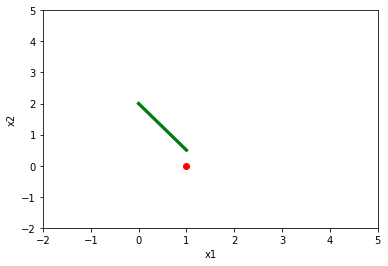

In [ ]:

from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation 
from matplotlib import rc
# initializing a figure in 
# which the graph will be plotted
fig = plt.figure() 
   
# marking the x-axis and y-axis
axis = plt.axes(xlim =(-2, 5), 
                ylim =(-2, 5)) 
axis.set_xlabel('x1')
axis.set_ylabel('x2')
  
# initializing a line variable
lineorg= axis.plot([], [], lw = 3)[0]
point=axis.plot([],[],lw=2,c='r',marker='o')[0]
lineadj=axis.plot([], [], lw = 3,c='g')[0]
   
# data which the line will 
# contain (x, y)
   
def animate(i,lineorg,lineadj,point,xw,yw):
    print(i)
    ox = xw[2*i:2*i+2]
    oy= yw[2*i:2*i+2]
    ax=xw[2*i+2:2*i+4]
    ay=yw[2*i+2:2*i+4]
    px=xp[i]
    py=yp[i]
    # plots a sine graph
    lineorg.set_data(ox, oy)
    lineadj.set_data(ax, ay)
    point.set_data(px,py)
    return lineorg,lineadj,point
   
anim = FuncAnimation(fig, animate,frames =35,fargs=(lineorg,lineadj,point,xw,yw),interval =300, blit = True)
from IPython.display import HTML
rc('animation', html='html5')
anim


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>